# Summary Statistics

In [19]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

excess_ret = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name="excess returns").drop("QAI", axis=1).drop("Date", axis=1)

annual_mean = excess_ret.mean() * 12
annual_vol = np.sqrt(excess_ret.var() * 12)
sharpe = annual_mean/annual_vol
print("Annualized Mean of Excess Returns")
display(annual_mean)
print("Annualized Volatility of Excess Returns")
display(annual_vol)
print("Annualized Sharpe Ratio")
display(sharpe)

Annualized Mean of Excess Returns


BWX   -0.007716
DBC   -0.005292
EEM    0.029339
EFA    0.061775
HYG    0.041371
IEF    0.016404
IYR    0.074916
PSP    0.092561
SPY    0.128141
TIP    0.020502
dtype: float64

Annualized Volatility of Excess Returns


BWX    0.082789
DBC    0.166553
EEM    0.176164
EFA    0.150903
HYG    0.075928
IEF    0.063442
IYR    0.168675
PSP    0.213370
SPY    0.142839
TIP    0.051115
dtype: float64

Annualized Sharpe Ratio


BWX   -0.093202
DBC   -0.031774
EEM    0.166542
EFA    0.409372
HYG    0.544873
IEF    0.258569
IYR    0.444143
PSP    0.433804
SPY    0.897103
TIP    0.401091
dtype: float64

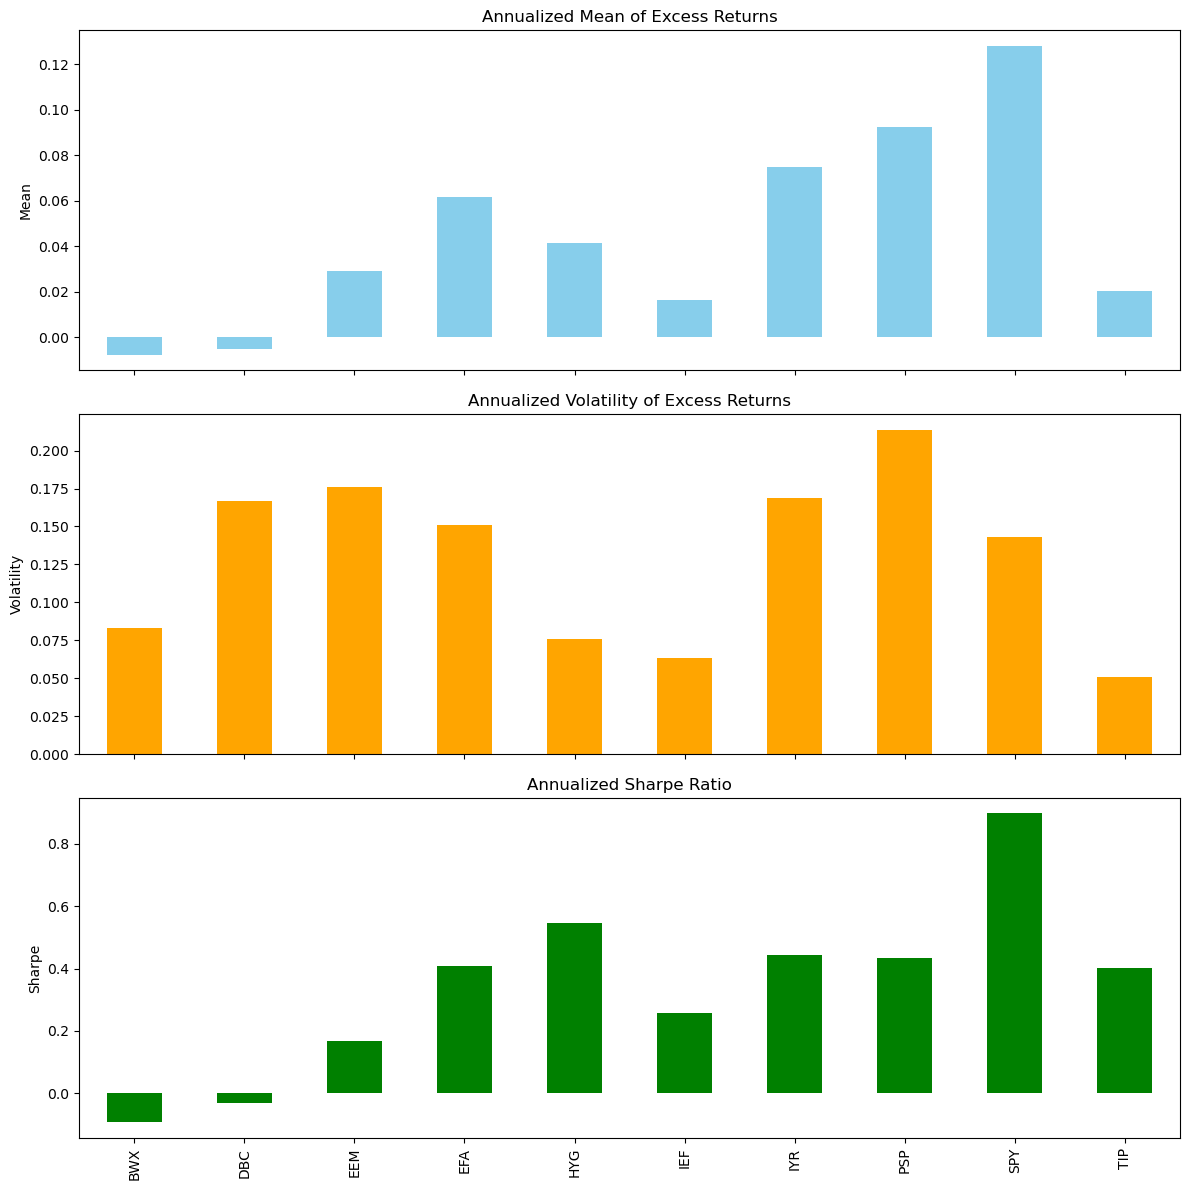

In [20]:
summary = pd.DataFrame({
    "Annual Mean": annual_mean,
    "Annual Volatility": annual_vol,
    "Sharpe Ratio": sharpe
})

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

summary["Annual Mean"].plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Annualized Mean of Excess Returns")
axes[0].set_ylabel("Mean")

summary["Annual Volatility"].plot(kind="bar", ax=axes[1], color="orange")
axes[1].set_title("Annualized Volatility of Excess Returns")
axes[1].set_ylabel("Volatility")

summary["Sharpe Ratio"].plot(kind="bar", ax=axes[2], color="green")
axes[2].set_title("Annualized Sharpe Ratio")
axes[2].set_ylabel("Sharpe")

plt.tight_layout()
plt.show()

SPY and HYG have the highest annualized sharpe ratios (0.897 and 0.545 respectively). Both BWX and DBC failed to exceed our risk-free rate, with sharpe ratios of -0.093 and -0.032 respectively

# Descriptive Analysis

In [21]:
corr = excess_ret.corr()
display(corr)

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
BWX,1.000000,0.191116,0.621673,0.602820,0.602555,0.580891,0.552557,0.526692,0.439994,0.675151
DBC,0.191116,1.000000,0.511667,0.500922,0.461887,-0.300207,0.280518,0.453303,0.432162,0.109006
EEM,0.621673,0.511667,1.000000,0.819925,0.691167,0.026704,0.584063,0.750109,0.687751,0.378792
EFA,0.602820,0.500922,0.819925,1.000000,0.787191,0.042639,0.699292,0.895320,0.845863,0.394821
HYG,0.602555,0.461887,0.691167,0.787191,1.000000,0.187258,0.739356,0.812157,0.793518,0.538648
IEF,0.580891,-0.300207,0.026704,0.042639,0.187258,1.000000,0.316532,0.022436,0.000815,0.754102
IYR,0.552557,0.280518,0.584063,0.699292,0.739356,0.316532,1.000000,0.749836,0.754711,0.598742
PSP,0.526692,0.453303,0.750109,0.895320,0.812157,0.022436,0.749836,1.000000,0.891687,0.408005
SPY,0.439994,0.432162,0.687751,0.845863,0.793518,0.000815,0.754711,0.891687,1.000000,0.381625
TIP,0.675151,0.109006,0.378792,0.394821,0.538648,0.754102,0.598742,0.408005,0.381625,1.000000


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
BWX,1.000000,0.191116,0.621673,0.602820,0.602555,0.580891,0.552557,0.526692,0.439994,0.675151
DBC,0.191116,1.000000,0.511667,0.500922,0.461887,-0.300207,0.280518,0.453303,0.432162,0.109006
EEM,0.621673,0.511667,1.000000,0.819925,0.691167,0.026704,0.584063,0.750109,0.687751,0.378792
EFA,0.602820,0.500922,0.819925,1.000000,0.787191,0.042639,0.699292,0.895320,0.845863,0.394821
HYG,0.602555,0.461887,0.691167,0.787191,1.000000,0.187258,0.739356,0.812157,0.793518,0.538648
IEF,0.580891,-0.300207,0.026704,0.042639,0.187258,1.000000,0.316532,0.022436,0.000815,0.754102
IYR,0.552557,0.280518,0.584063,0.699292,0.739356,0.316532,1.000000,0.749836,0.754711,0.598742
PSP,0.526692,0.453303,0.750109,0.895320,0.812157,0.022436,0.749836,1.000000,0.891687,0.408005
SPY,0.439994,0.432162,0.687751,0.845863,0.793518,0.000815,0.754711,0.891687,1.000000,0.381625
TIP,0.675151,0.109006,0.378792,0.394821,0.538648,0.754102,0.598742,0.408005,0.381625,1.000000


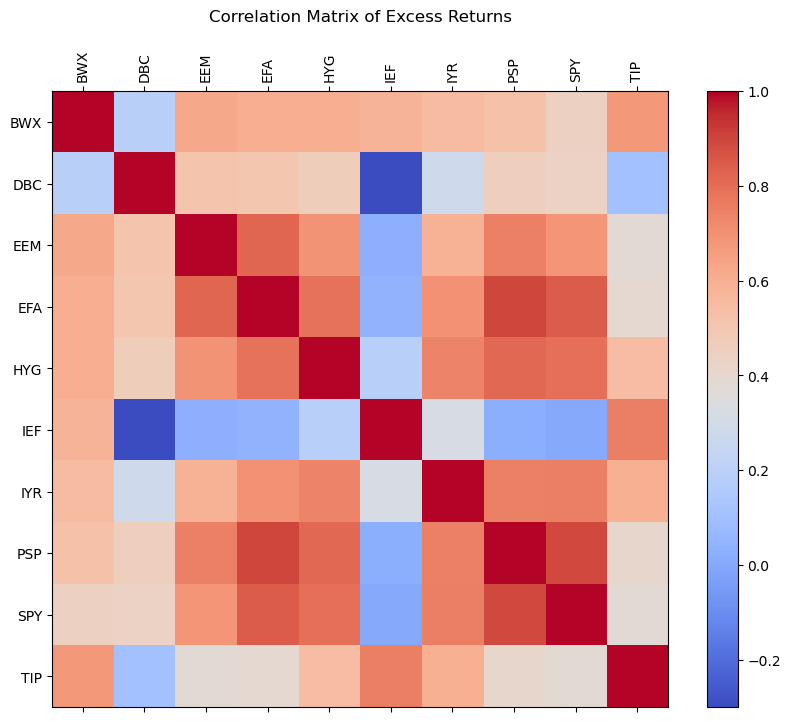

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap="coolwarm")

display(corr)
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

plt.title("Correlation Matrix of Excess Returns", pad=20)
plt.show()

In [26]:
corr_pairs = corr.unstack()
corr_pairs = corr_pairs.drop(labels=[(col, col) for col in corr.columns])
sorted_corr = corr_pairs.sort_values()

print("Lowest correlations:")
print(sorted_corr.head())

print("Highest correlations:")
print(sorted_corr.tail())

Lowest correlations:
IEF  DBC   -0.300207
DBC  IEF   -0.300207
SPY  IEF    0.000815
IEF  SPY    0.000815
PSP  IEF    0.022436
dtype: float64
Highest correlations:
SPY  EFA    0.845863
     PSP    0.891687
PSP  SPY    0.891687
EFA  PSP    0.895320
PSP  EFA    0.895320
dtype: float64


The asset pair with the highest correlations is SPY & EFA (0.846), while the pair with the lowest correlation is IEF & DBC (-0.3)

TIPS  outperforms both domestic and foreign bonds as proxied through IEF and BWX respectively. Out of all assets with positive annualized excess returns, TIPS only beats IEF, with the former's being 2.05% and the latter's 1.64%. On a risk-adjusted basis, TIPS still outperforms IEF with a sharpe ratio of 0.401 versus 0.016. BWX saw negative excess returns.

# MV Frontier

In [48]:
cov = excess_ret.cov() * 12
I = np.eye(cov.shape[0])
inv_cov = np.linalg.solve(cov, I)
mu = annual_mean.to_numpy()
weights = inv_cov @ mu
weights = weights / weights.sum()
weights = pd.Series(weights, index=annual_mean.index)
print("Sorted Tangency Portfolio Weights")
display(weights.sort_values())

Sorted Tangency Portfolio Weights


BWX   -0.850643
PSP   -0.332995
IYR   -0.246582
DBC   -0.071623
EEM    0.026437
EFA    0.068682
TIP    0.175293
HYG    0.290614
IEF    0.881186
SPY    1.059632
dtype: float64

In [49]:
print("Sorted Sharpe Ratios")
display(sharpe.sort_values())

Sorted Sharpe Ratios


BWX   -0.093202
DBC   -0.031774
EEM    0.166542
IEF    0.258569
TIP    0.401091
EFA    0.409372
PSP    0.433804
IYR    0.444143
HYG    0.544873
SPY    0.897103
dtype: float64

Besides SPY and BWX, every other asset class has a different ranking between their tangency weight and sharpe ratio

In [50]:
tan_mean = weights @ annual_mean
tan_vol = np.sqrt(weights @ cov @ weights)
tan_sharpe = tan_mean/tan_vol
print("Tangency Portfolio Annualized Mean, Volatility, and Sharpe Ratio")
display(tan_mean)
display(tan_vol)
display(tan_sharpe)

Tangency Portfolio Annualized Mean, Volatility, and Sharpe Ratio


0.12852049698605605

0.08747709979095218

1.4691901914122332

# TIPS

In [47]:
no_tips = excess_ret.drop("TIP", axis=1)


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY
0,0.007027,0.042120,-0.000027,0.035908,0.014763,-0.001674,0.045614,0.040556,0.035147
1,0.008755,0.026909,0.063224,-0.023555,0.000752,-0.001218,-0.010607,0.016995,0.000448
2,0.048760,0.045514,0.027283,0.056214,0.015932,0.018369,0.046589,0.058627,0.028917
3,-0.012945,-0.051124,-0.028800,-0.021461,0.001933,0.025654,0.010733,-0.040965,-0.010615
4,0.000230,-0.042318,-0.009027,-0.011781,-0.005378,-0.004716,-0.030733,-0.042254,-0.016542
...,...,...,...,...,...,...,...,...,...
167,-0.002198,0.024463,0.018388,0.044877,0.010472,0.003033,0.015780,0.064862,0.023724
168,0.011376,-0.001250,0.008855,0.026915,0.007087,0.025382,0.035246,-0.042722,-0.015310
169,0.007510,0.019885,0.008497,-0.001004,-0.013701,0.000577,-0.026225,-0.063669,-0.058562
170,0.054708,-0.088766,-0.001615,0.033962,-0.001817,0.007573,-0.024503,-0.009856,-0.011659
